In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict
import numpy as np


In [2]:
def visualize_pe_vs_ps(tickers):
    pe_ratios = []
    ps_ratios = []
    valid_tickers = []

    for ticker_symbol in tickers:
        ticker = yf.Ticker(ticker_symbol)
        info = ticker.info

        # Obtener P/E y P/S ratios
        pe_ratio = info.get("forwardPE", None) or info.get("trailingPE", None)
        ps_ratio = info.get("priceToSalesTrailing12Months", None)

        # Agregar datos válidos a las listas
        if pe_ratio is not None and ps_ratio is not None:
            pe_ratios.append(pe_ratio)
            ps_ratios.append(ps_ratio)
            valid_tickers.append(ticker_symbol)

    # Verificar si hay datos válidos
    if not pe_ratios or not ps_ratios:
        print("No se encontraron suficientes datos para los tickers proporcionados.")
        return

    # Crear scatterplot
    plt.figure(figsize=(10, 6))
    plt.scatter(ps_ratios, pe_ratios, color='blue', alpha=0.7)

    # Agregar etiquetas
    for i, ticker in enumerate(valid_tickers):
        plt.text(ps_ratios[i], pe_ratios[i], ticker, fontsize=9, ha='right')

    plt.title("Relación P/E vs P/S", fontsize=16)
    plt.xlabel("P/S Ratio (Price to Sales)", fontsize=14)
    plt.ylabel("P/E Ratio (Price to Earnings)", fontsize=14)
    plt.grid(alpha=0.4, linestyle='--')
    plt.show()

In [3]:
# Función para obtener y graficar ratios P/E y P/S por sector
def visualize_sector_ratios(tickers_by_sector):
    sector_pe = {}
    sector_ps = {}

    for sector, tickers in tickers_by_sector.items():
        pe_values = []
        ps_values = []

        for ticker_symbol in tickers:
            ticker = yf.Ticker(ticker_symbol)
            info = ticker.info

            # Obtener ratios P/E y P/S
            pe_ratio = info.get("forwardPE", None) or info.get("trailingPE", None)
            ps_ratio = info.get("priceToSalesTrailing12Months", None)

            # Agregar valores válidos
            if pe_ratio is not None:
                pe_values.append(pe_ratio)
            if ps_ratio is not None:
                ps_values.append(ps_ratio)

        # Calcular promedio o mediana (usa mediana para evitar sesgos de outliers)
        if pe_values:
            sector_pe[sector] = np.median(pe_values)
        if ps_values:
            sector_ps[sector] = np.median(ps_values)

    # Verificar si tenemos datos
    if not sector_pe or not sector_ps:
        print("No se encontraron suficientes datos para los sectores proporcionados.")
        return

    # Crear scatterplot
    sectors = list(sector_pe.keys())
    pe_ratios = [sector_pe[sector] for sector in sectors]
    ps_ratios = [sector_ps[sector] for sector in sectors]

    plt.figure(figsize=(10, 6))
    plt.scatter(ps_ratios, pe_ratios, color='orange', alpha=0.8)

    # Etiquetas
    for i, sector in enumerate(sectors):
        plt.text(ps_ratios[i], pe_ratios[i], sector, fontsize=9, ha='right')

    plt.title("Relación P/E vs P/S por Sector", fontsize=16)
    plt.xlabel("P/S Ratio (Price to Sales)", fontsize=14)
    plt.ylabel("P/E Ratio (Price to Earnings)", fontsize=14)
    plt.grid(alpha=0.4, linestyle='--')
    plt.show()



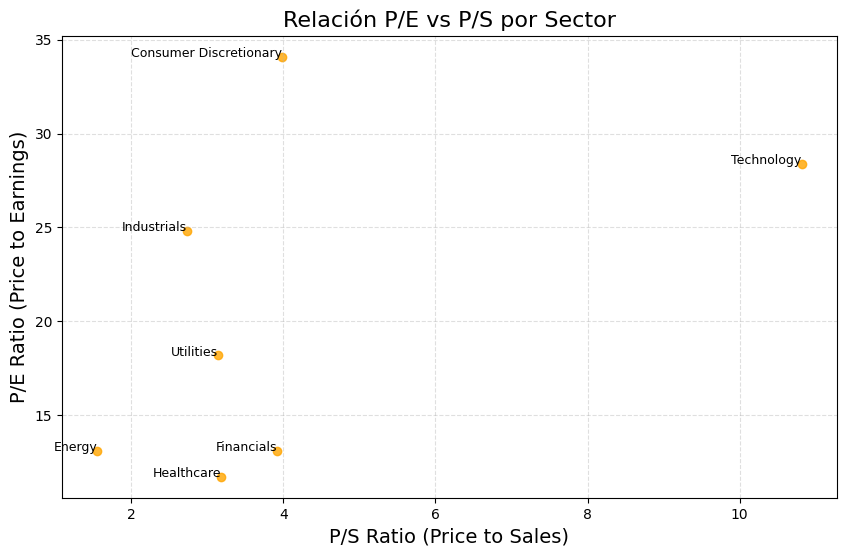

In [4]:
# Llamar a la función
# Ejemplo de uso: Tickers representativos de cada sector
tickers_by_sector = {
    "Technology": ["AAPL", "MSFT", "GOOGL", "NVDA"],
    "Healthcare": ["JNJ", "PFE", "MRK", "UNH"],
    "Financials": ["JPM", "BAC", "WFC", "C", "MS", "GS", "MA", "V"],
    "Consumer Discretionary": ["AMZN", "TSLA", "HD", "MCD", "WMT"],
    "Energy": ["XOM", "CVX", "COP", "SLB"],
    "Industrials": ["BA", "MMM", "CAT", "GE"],
    "Utilities": ["NEE", "DUK", "SO", "EXC"],
}
visualize_sector_ratios(tickers_by_sector)

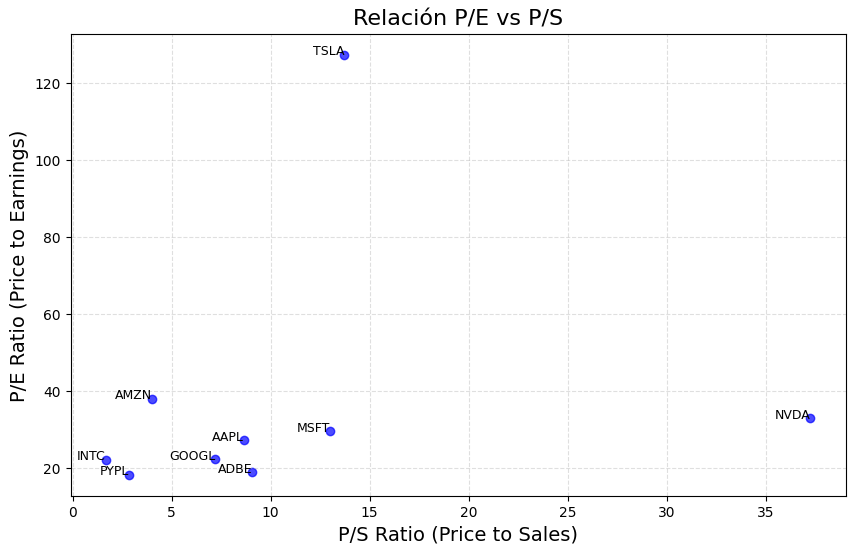

In [5]:
visualize_pe_vs_ps(["AAPL", "AMZN", "GOOGL", "TSLA", "MSFT", "FB", "NVDA", "ADBE", "PYPL", "INTC"])

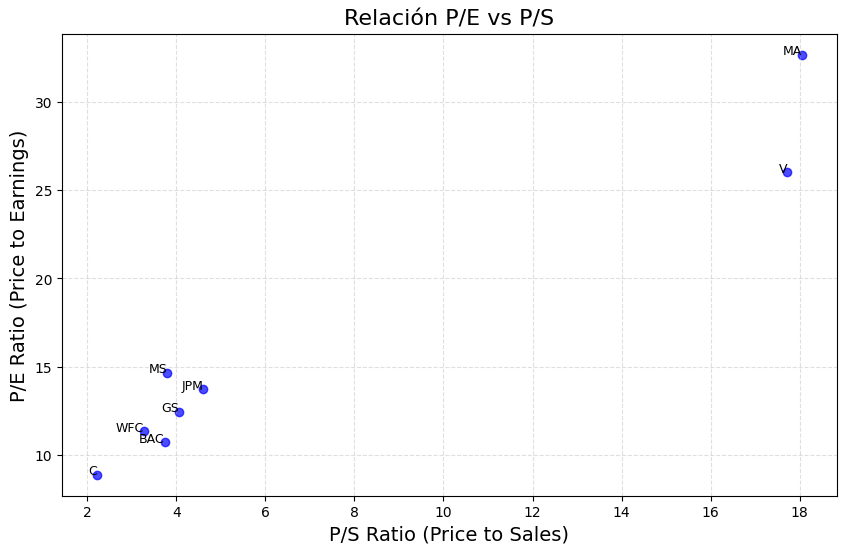

In [6]:
visualize_pe_vs_ps(["JPM", "BAC", "WFC", "C", "MS", "GS", "MA", "V"])

In [17]:
def calcular_earnings_yield(ticker):
    stock = yf.Ticker(ticker)
    history = stock.history(period="5y", interval="3mo")  # Datos históricos de los últimos 3 años, actualizados cada 3 meses
    earnings_yield_data = []

    for date, row in history.iterrows():
        price = row['Close']
        earnings_per_share = stock.info.get('trailingEps')
        if earnings_per_share and price:
            earnings_yield = earnings_per_share / price
            earnings_yield_data.append((date, earnings_yield))

    if not earnings_yield_data:
        print("Datos insuficientes.")
        return

    # Crear DataFrame para facilitar la visualización
    df = pd.DataFrame(earnings_yield_data, columns=['Date', 'Earnings Yield'])
    df.set_index('Date', inplace=True)

    # Visualización
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Earnings Yield'], marker='o', linestyle='-')
    plt.title(f"Earnings Yield para {ticker} en los últimos 5 años")
    plt.xlabel("Fecha")
    plt.ylabel("Earnings Yield")
    plt.grid(True)
    plt.show()

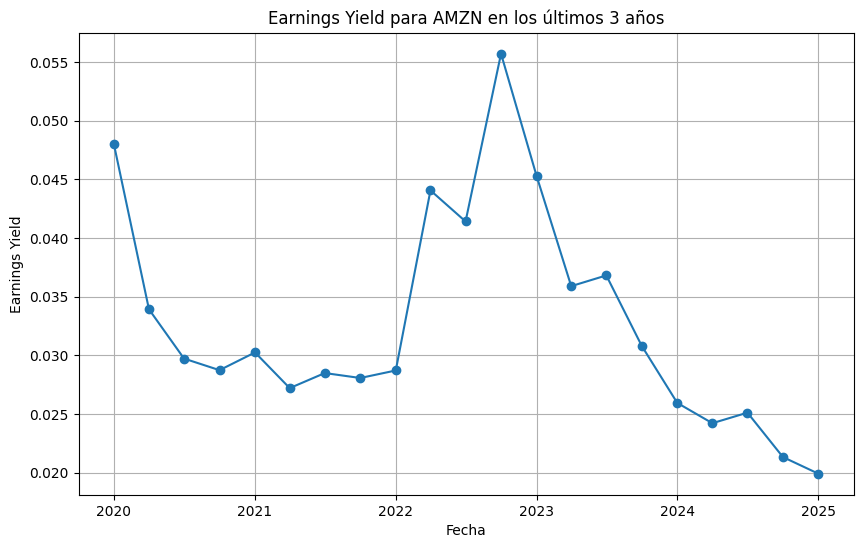

In [8]:
# Ejemplo de uso
ticker = "AMZN"
calcular_earnings_yield(ticker)

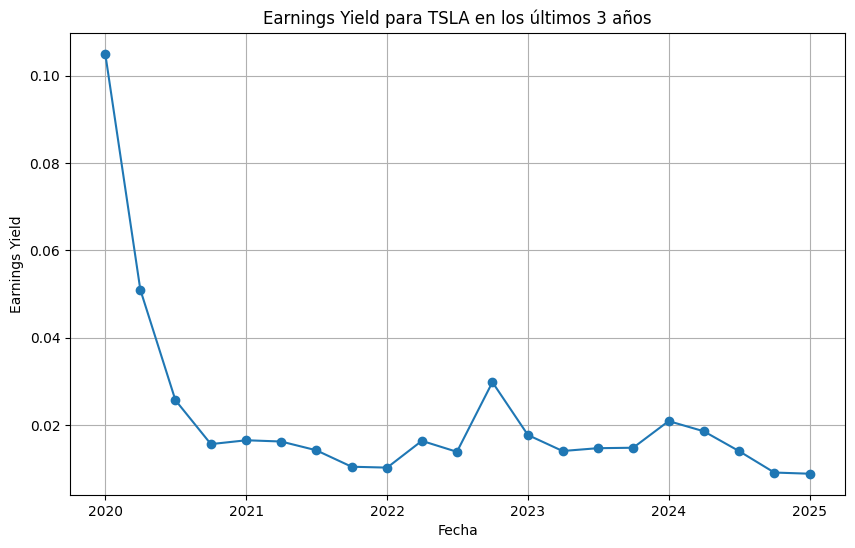

In [9]:
ticker = "TSLA"
calcular_earnings_yield(ticker)

In [12]:
# Función para hacer un plot de un ticker recibido como argumento a partir de los ultimos 5 años
def plot_stock(ticker):
    stock = yf.Ticker(ticker)
    history = stock.history(period="5y")
    plt.figure(figsize=(12, 6))
    plt.plot(history.index, history['Close'], label=ticker)
    plt.title(f"Precio de Cierre de {ticker} en los últimos 5 años")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de Cierre")
    plt.legend()
    plt.grid(True)
    plt.show()

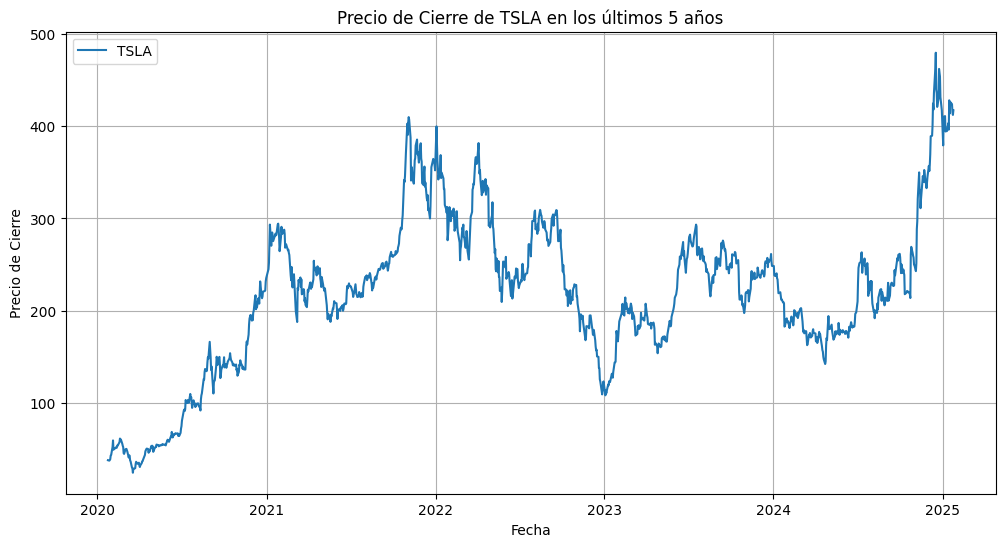

In [16]:
plot_stock("TSLA")

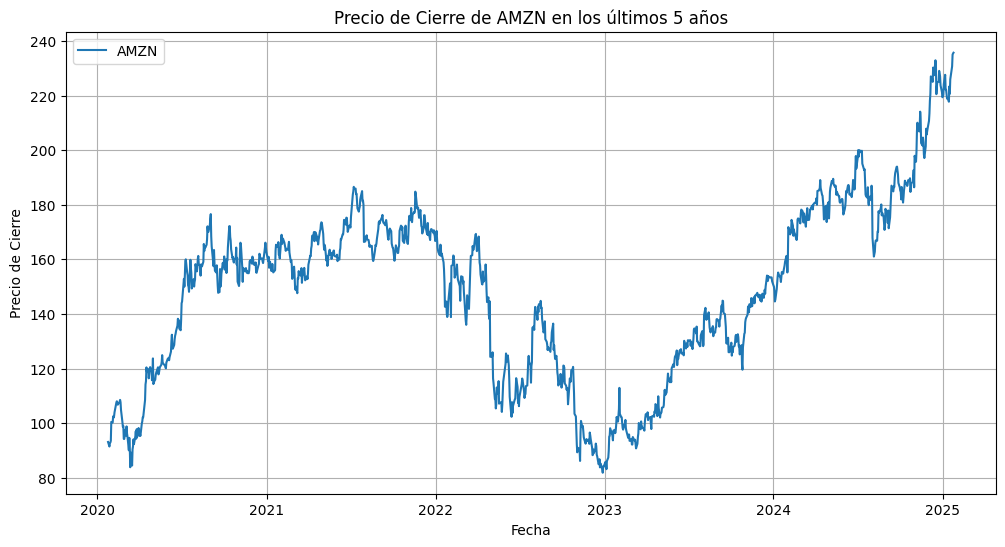

In [15]:
plot_stock("AMZN")